In [1]:
import os
import json
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res_dir = "/data/projects/robin/cell_free/proteomics_WGCNA/"
res_dir_py = "./"

corr_path = "moduleTraitCor.csv"
pval_path = "moduleTraitPvalue.csv"

In [3]:
df_corr = pd.read_csv(os.path.join(res_dir, corr_path), index_col=0)
df_pval = pd.read_csv(os.path.join(res_dir, pval_path), index_col=0)

In [4]:
sns.set(style="white", font_scale=1.2)

In [5]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df_corr, cmap="RdBu_r")

In [6]:
row_colors = [''.join(i for i in module if not i.isdigit()).split("ME")[1] for module in df_corr.index]

In [7]:
row_colors

['darkorange',
 'darkturquoise',
 'darkred',
 'lightcyan',
 'royalblue',
 'yellow',
 'darkgreen',
 'grey',
 'saddlebrown',
 'white',
 'magenta',
 'darkgrey',
 'turquoise',
 'brown',
 'purple',
 'blue',
 'black',
 'cyan',
 'grey']

In [9]:
order = ["low", "high"]

In [10]:
df_annot = pd.DataFrame(columns=df_corr.columns, index=df_corr.index)

def get_star(x):
    if x<=0.01:
        star = "**"
    elif x<=0.05:
        star = "* "
    else:
        star = "  "
        
    return star

for i in df_annot.index:
    for j in df_annot.columns:
        star = get_star(df_pval.loc[i, j])
        df_annot.loc[i, j] = str(round(df_corr.loc[i,j],2)) + " {}".format(star)

In [11]:
# figsize=(8,10)

In [12]:
f = os.path.join(res_dir, "module_genes.json")
with open(f, 'r') as JSON:
    geneset_dict = json.load(JSON)

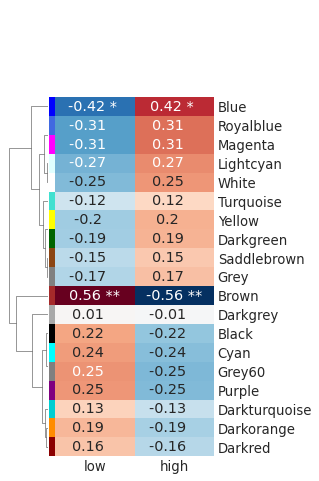

<Figure size 432x288 with 0 Axes>

In [ ]:
to_cluster = df_corr[order].copy()
to_cluster.columns = [col for col in to_cluster.columns]

to_cluster_pval = df_pval[order].copy()
to_cluster_pval.columns = [col for col in to_cluster_pval.columns]

to_annot = df_annot[order].copy()
to_annot.columns = [col.upper() for col in to_annot.columns]

g = sns.clustermap(to_cluster, cmap="RdBu_r", row_colors=row_colors, col_cluster=False, annot=to_annot, fmt="",
                  figsize=(5,7)) #, figsize=figsize)

newlabels = []
for i in range(len(g.ax_heatmap.get_yticklabels())):
    label = g.ax_heatmap.get_yticklabels()[i]
    if (df_pval.loc[label.get_text()]<=0.05).any():
        # newlabels.append(label.get_text()+" (" + r"$n$" +"={})".format(len(geneset_dict[label.get_text()]))) #+ r"$n:$" 
        newlabels.append(label.get_text().split("ME")[-1].capitalize())
    else:
        newlabels.append(label.get_text().split("ME")[-1].capitalize())
        
g.ax_heatmap.tick_params(axis='both', which='both', length=0)
g.ax_heatmap.set_yticklabels(newlabels)

g.cax.set_visible(False)

# plt.savefig("heatmap_moduleCorrPval.pdf", bbox_inches="tight")
plt.show()
plt.clf()

In [31]:
## load module genes to try with Enrichr

geneset = pd.read_csv("/data/projects/robin/cell_free/proteomics_WGCNA/figures/genesets/geneset_MEblue.csv",
                      index_col=0).index.tolist()

In [33]:
for gene in geneset:
    print(gene)

TUBB4A
TUBA4A
ATP1A3
ATP1A1
NEFM
CNP
STXBP1
NEFL
AKAP12
NSF
YWHAZ
INA
ATP2B1
ENO2
MAPT
GPI
MAP1A
DNM1
SNAP25
TNR
GNB1
NCAM1
GNAO1
ATP6V1A
CNTN1
HK1
EPB41L3
NEFH
CORO1A
FTL
TPM3
ATP2B2
SYN1
YWHAH
SPTBN2
UCHL1
ATP6V1B2
MBP
BASP1
NFASC
MAP6
STX1B
PFKP
QDPR
FTH1
MDH1
MOG
CAMK2B
TPPP
FBXO2
STX1A
GOT1
PACSIN1
PPP3CA
ACTR1A
NAPB
VAMP2
CNTNAP1
ANXA7
SYN2
CAMK2G
2023-09-03 00:00:00
CYFIP2
CSRP1
VSNL1
SYNJ1
ATP6V1B1
DNM1L
ATP1B1
SNCA
EFHD2
IGSF8
NRCAM
2023-09-05 00:00:00
ATP6V0A1
GNAQ
SIRT2
TAGLN3
PLP1
GDA
PRKAR2B
HSPA12A
NCDN
BIN1
ATP6V1E1
CRYM
L1CAM
SNAP91
RAB3A
SLC25A12
ATP6V1G2
DPP6
ANXA11
EHD3
IDH3A
PMP2
ATP6V1H
PRDX3
SH3GL2
MAG
SH3GLB2
PDXP
PRRT2
APCS
AMPH
PCSK1N
SYT1
CD59
OXR1
HAGH
MAP2K1
PRNP
CADM2
GNG2
CEND1
ME1
ACOT7
GLS
SCG2
SLC44A1
PCP4
KIAA1045
CAMKV
PPP3R1
PFKFB2
SLC17A7
BCAS1
HPCA
OPALIN
DYNC1I1
HAPLN2
SCAMP1
NRGN
CADM3
CPNE6
ATP6V0D1
PTGDS
SYN3
DMTN
NPTN
WASF1
PPP1R14A
PLXNA1
RAP2B
PRKCG
SYP
HPRT1
HINT3
PRUNE2
ATL1
SYNGR3
DNAJC6
SH3BP1
NAPG
ATP6V1D
ATCAY
CISD1
TERF2IP
NUMBL
RASAL